# **회귀 모델링 프로세스 이해하기**
이번 과제에선 회귀 분석과 더불어 전체적인 모델링 프로세스에 대해 이해해보겠습니다. 



### 데이터셋 설명 ('Concrete_data.csv')
콘크리트는 건설 및 토목공학 분야에서 가장 중요한 재료 중 하나로 널리 사용됩니다. <br/> <br/>
콘크리트의 **압축강도**는 재료의 성능을 평가하는 주요 지표이며, 이는 **양생기간과 혼합에 사용되는 재료 성분**들에 따라 결정됩니다. <br/><br/>
이번 과제의 목표는 이러한 입력 변수들을 바탕으로 **콘크리트의 압축강도를 예측할 수 있는 회귀 모델을 구축**하는 것입니다.

**독립변수**  <br/><br/>
단위: kg/m³
- Cement
- Blast Furnace Slag
- Fly Ash
- Water
- Superplasticizer
- Coarse Aggregate
- Fine Aggregate


단위: 일 (1일 ~ 365일)  
- Age (양생 기간)
<br/><br/>

**종속변수**  <br/><br/>
단위: MPa (Megapascal)
- csMPa


# 1 데이터 탐색

In [1]:
# 데이터 전처리 패키지
import numpy as np
import pandas as pd

# 데이터 시각화 패키지
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# 데이터 불러오기
data=pd.read_csv('Concrete_data.csv')

#### 1.a 데이터셋의 크기, 변수의 데이터 타입 등을 확인해줍니다.

In [4]:
data.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


<span style="color:red"> ***를 채워주세요 <span>

In [7]:
# 데이터셋의 크기 확인
data.shape

(1030, 9)

In [5]:
# info로 데이터 타입 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


#### 데이터의 모든 변수는 수치형 데이터(Int, Float)로 확인되며, 결측치가 존재하지 않는다. (물론 0,? 등으로 표시된 결측치는 따로 확인해함!!)

#### 1.b 중복 데이터를 확인해 삭제해 줍니다.

In [8]:
# 중복 데이터 확인
dupes=data.duplicated()
print(' The number of duplicates in the dataset are:',sum(dupes), '\n')

pd.DataFrame(data[dupes])


 The number of duplicates in the dataset are: 25 



,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
77,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
80,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
86,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
88,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
91,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
100,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.20
103,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.20
109,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.90
111,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.90
123,425.0,106.3,0.0,153.5,16.5,852.1,887.1,28,60.29


In [9]:
# 중복 열 제거하기
data.drop_duplicates(keep="first", inplace=True)

# 중복 여부 확인
dupes1 = data.duplicated()
print("The number of duplicates in the dataset are:", sum(dupes1), "\n")


The number of duplicates in the dataset are: 0 



## 1.c EDA 

#### 데이터셋을 자유롭게 EDA해 보고, 변수들의 분포나 변수 간의 관계를 살펴본 뒤 드는 생각을 간단히 정리해 보세요. (시각화/비시각화 방법으로 각 1개 이상)

#### 필요하다면 통계적 검정을 활용해봐도 좋아요!


#### <span style="color:red"> *** <span>

csMPa가 cement와 약 0.49(반올림)으로 가장 큰 양의 상관관계를 가진다. 즉, 시멘트가 많을 수록 강도가 상승한다는 것을 알 수 있다. 반면, w/c ratio와의 약 -0.49으로 가장 큰 양의 상관관계를 가진다. 즉, 물 대비 시멘트가 많을수록 강도가 높다는 것을 알 수 있다.

#w/c ratio는 water-to-cement ratio의 약자로, 콘크리트 배합 설계에서 물(물의 양) ÷ 시멘트(시멘트 양) 로 계산하는 물-시멘트 비를 말해요. -> 지피티 사용...!!!

csMPa               1.000000
cement              0.488283
superplasticizer    0.344209
age                 0.337367
slag                0.103374
flyash             -0.080648
coarseaggregate    -0.144717
fineaggregate      -0.186448
water              -0.269624
w/c ratio          -0.489401
Name: csMPa, dtype: float64

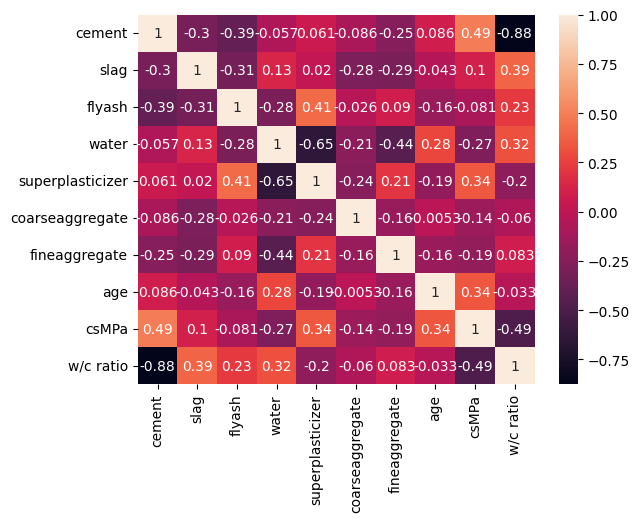

In [ ]:
from scipy import stats as spst
# EDA
# 시각화_heatmap 사용
sns.heatmap(data.corr(), annot=True)
# 비시각화
data.corr()['csMPa'].sort_values(ascending=False)


# 2 피처 엔지니어링

In [12]:
data.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30



## 2.a 변수의 생성 및 삭제

### 2.a.i 파생변수 생성

콘크리트 내구성의 핵심 요소는 **물과 시멘트 비율**입니다.

따라서 파생변수 생성을 통해 새로운 칼럼을 생성해 봅시다.

In [13]:
data['w/c ratio']=data['water']/data['cement']

In [14]:
data.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa,w/c ratio
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99,0.300000
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89,0.300000
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27,0.685714
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05,0.685714
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30,0.966767


### 2.a.ii 차원 축소(PCA) 및 스케일링

이번 과제에선 차원 축소 기법으로 PCA를 활용해보겠습니다.

우리의 전략은 다음과 같아요.

- 모델 1: 모든 변수를 그대로 사용하여 학습

- 모델 2: PCA를 이용해 차원을 축소한 후 학습


이 두 모델을 비교 분석한 뒤 차원 축소를 적용한 모델이 더 적합한지, 원본 변수를 유지한 모델이 더 적합한지를 판단하여 최종적으로 성능이 좋은 모델을 체택할 예정입니다.

In [15]:
# 데이터를 변형시킬 땐 원본 데이터를 보존하기 위해 복사본 생성하는 것이 좋아요.
data1 = data.copy()


In [17]:
import scipy.stats as stats
from scipy.stats import zscore
from sklearn.decomposition import PCA

# Z-score 표준화로 적용하여 스케일링
data_scaled=data1.apply(zscore)

# 종속변수 'csMPa'를 제외하고 독립변수만 추출
X_scaled=data_scaled.drop('csMPa', axis=1) # 열 drop은 axis = ?

#### PCA 모델로 우선 8개의 주성분을 추출한 후, 최종적으로는 95% 누적 분산을 설명하는 개수로 확정 예정입니다

In [18]:
pca = PCA(n_components=8)

# 스케일링된 데이터에 PCA 모델 학습
pca.fit(X_scaled)

,n_components,8
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


PCA 진행 후 아래와 같이 고유값과 설명된 분산 비율을 확인할 수 있어요.

In [19]:
# Eigen Values
# 각 주성분이 설명하는 분산의 크기를 의미
# 값이 클수록 해당 주성분이 데이터의 정보(분산)를 많이 담고 있음

print(pca.explained_variance_)

[2.35316571 2.20985408 1.35277753 1.02291423 0.96645795 0.79209809
 0.19820651 0.08363247]


In [20]:
# Eigen Vectors
print(pca.components_)

[[-1.91956842e-01  3.15463386e-01 -2.66457387e-01  5.52815981e-01
  -4.74419640e-01 -2.87045612e-02 -3.06395895e-01  2.18768968e-01
   3.45534545e-01]
 [ 6.09516383e-01 -1.85480511e-01 -3.81625638e-01  1.14256362e-01
  -1.67602503e-01  8.08865928e-02 -2.53164742e-01  2.01017818e-01
  -5.44298012e-01]
 [-1.79077899e-01 -5.56006083e-01  2.05489283e-01  1.27523384e-02
  -3.73725305e-01  6.75959654e-01  5.79925225e-02  1.04295947e-01
   7.46125950e-02]
 [-2.26524583e-02  4.11333899e-01 -1.71094843e-01 -2.67508381e-01
   4.10365454e-02  5.31672685e-01 -4.17497359e-01 -5.19332639e-01
  -3.29671610e-02]
 [-4.33887038e-02  3.61102747e-02 -6.02576514e-01 -1.21302891e-01
  -3.04347560e-01  1.54516771e-02  6.76185907e-01 -2.61660278e-01
   2.09987515e-02]
 [-1.43248979e-01  3.03417985e-01 -2.19966196e-01 -3.78849861e-01
   2.21904959e-01  2.83316773e-01  9.23299402e-02  7.46436531e-01
   1.73894994e-02]
 [-4.64352337e-03 -3.00174596e-01 -3.97557996e-01  4.25015686e-01
   6.70149161e-01  2.1634659

각 주성분이 데이터를 얼마나 설명하고 있는지 분산 비율을 확인해보겠습니다.

In [21]:
print(pca.explained_variance_ratio_)

[0.26120269 0.24529502 0.15015905 0.11354404 0.10727737 0.08792333
 0.02200103 0.00928325]


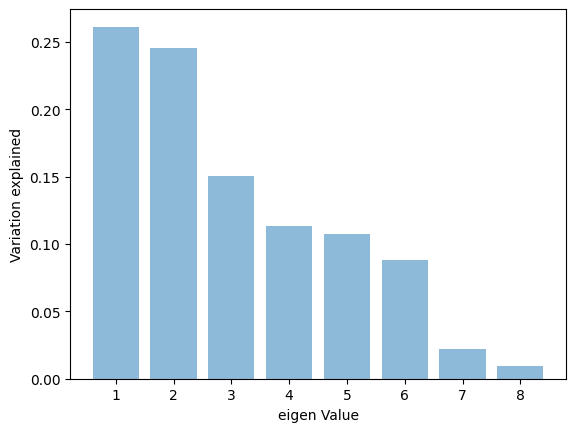

In [22]:
# 주성분 별 설명분산 비율 시각화
plt.bar(list(range(1,9)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

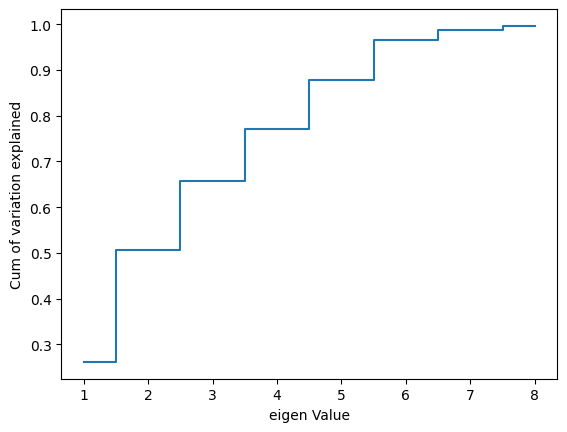

In [23]:
# 누적 설명분산 비율 시각화
plt.step(list(range(1,9)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

In [24]:
# 각 주성분을 추가했을 때 전체 분산을 몇 %까지 설명할 수 있는지를 계산
cum_var_exp = np.cumsum(pca.explained_variance_ratio_)
# print("Cumulative Variance Explained", cum_var_exp)
pd.DataFrame(cum_var_exp,columns=['Cumul Variance Explanation'],index=['1','2','3','4','5','6','7','8'])

,Cumul Variance Explanation
1,0.261203
2,0.506498
3,0.656657
4,0.770201
5,0.877478
6,0.965402
7,0.987403
8,0.996686


#### # 6개의 주성분이 95% 이상의 분산을 설명하므로 6개를 선택해 다시 PCA를 진행할게요!

In [25]:
pca6 = PCA(n_components=6)
pca6.fit(X_scaled)
print(pca6.components_)
print(pca6.explained_variance_ratio_)


Xpca6 = pca6.transform(X_scaled)
Y = data_scaled['csMPa']

[[-0.19195684  0.31546339 -0.26645739  0.55281598 -0.47441964 -0.02870456
  -0.30639589  0.21876897  0.34553455]
 [ 0.60951638 -0.18548051 -0.38162564  0.11425636 -0.1676025   0.08088659
  -0.25316474  0.20101782 -0.54429801]
 [-0.1790779  -0.55600608  0.20548928  0.01275234 -0.3737253   0.67595965
   0.05799252  0.10429595  0.0746126 ]
 [-0.02265246  0.4113339  -0.17109484 -0.26750838  0.04103655  0.53167269
  -0.41749736 -0.51933264 -0.03296716]
 [-0.0433887   0.03611027 -0.60257651 -0.12130289 -0.30434756  0.01545168
   0.67618591 -0.26166028  0.02099875]
 [-0.14324898  0.30341798 -0.2199662  -0.37884986  0.22190496  0.28331677
   0.09232994  0.74643653  0.0173895 ]]
[0.26120269 0.24529502 0.15015905 0.11354404 0.10727737 0.08792333]


# 3 모델 생성

#### 모델을 만들기 전에 PCA 변환된 데이터(Xpca6)와 타깃값(Y)을 학습/테스트 데이터셋으로 분리해야겠죠?

test_size=0.20 → 데이터의 20%를 테스트 데이터로 사용합니다.

<span style="color:red"> ***를 채워주세요 <span>

In [26]:
# 기계학습 모델 구축 및 평가 패키지
import scipy as sp
import scipy.stats as stats

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


X_train_pca, X_test_pca, y_train_pca, y_test_pca=train_test_split(Xpca6,Y,test_size=0.20,random_state=2025) 

PCA를 하지 않은 데이터에 대해서도 스케일링 후 학습/테스트셋으로 나눠줍니다.

In [27]:
data_scaled=data1.apply(zscore)

X = data_scaled.drop('csMPa', axis=1) # 종속변수 열 제외 axis = ?

y = data_scaled['csMPa']

# 특히 정규화 모델(Ridge, Lasso)은 변수 크기에 따라 가중치 패널티가 달라져서 스케일링이 반드시 필요합니다.

In [28]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.20,random_state=2025)

### **참고 )** 피쳐 스케일(단위)의 영향 <br/>
10 kg/m³와 10일은 전혀 다른 의미를 가지지만, 모델은 두 값을 단순히 숫자 10으로 인식하여 동일한 수준의 중요도로 처리합니다.


#### ✅ 스케일의 영향을 받는 알고리즘

**경사 하강법 기반 알고리즘**

- 선형 회귀 (Linear Regression)

- 로지스틱 회귀 (Logistic Regression)

**거리 기반 알고리즘**

- K-최근접 이웃 (KNN)

- K-Means 군집화 (K-Means)

- 서포트 벡터 머신 (SVM)

👉 표준화(Standardization) 또는 정규화(Normalization) 등의 스케일링 전처리 과정이 매우 중요


#### ✅ 스케일(단위)의 영향을 받지 않는 알고리즘

- 트리 기반 알고리즘

- 결정 트리 (Decision Tree)

- 랜덤 포레스트 (Random Forest)

- 그래디언트 부스팅 (XGBoost, LightGBM 등)

👉 트리 기반 모델은 변수의 분할 기준이 상대적이기 때문에, 절대적인 숫자의 크기나 단위는 모델 성능에 영향을 주지 않음

## 3.a 모델 결정

1. **선형회귀**

- 우선 가장 기본적인 기준 모델(Baseline)인 선형회귀(Linear Regression)부터 시작할게요. 

- 모델 성능을 비교하는 출발점이 되어줄 수 있어요.

2. **정규화 회귀 기법**

- Ridge Regression (L2 규제)

- Lasso Regression (L1 규제)

    → 다중공선성 문제 완화, 불필요한 변수 축소가 가능합니다.

### 3.a.1 Regression Model 1: Linear Regression

#### 모델 객체 생성, 학습

<span style="color:red"> ***를 채워주세요 <span>

In [29]:
from sklearn.linear_model import LinearRegression

# 1. 선형 회귀 모델 객체를 생성합니다.
regression_model = LinearRegression()

# 2. 학습 데이터(X_train, y_train)를 사용해 모델을 학습(fit)시킵니다.
regression_model.fit(X_train, y_train)

# 3. 테스트 데이터를 이용해 예측하고 y_pred에 저장합니다.
y_pred = regression_model.predict(X_test)

In [30]:
# 참고
# 회귀 계수(coefficient): 각 독립변수가 종속변수에 미치는 영향력의 크기와 방향을 나타냅니다.

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))

# 절편(intercept): 회귀선이 y축과 만나는 지점
intercept = regression_model.intercept_
print("The intercept for our model is {}".format(regression_model.intercept_))

The coefficient for cement is 0.7064468708924525
The coefficient for slag is 0.5963125020413392
The coefficient for flyash is 0.3771234883252203
The coefficient for water is -0.11786035046928693
The coefficient for superplasticizer is 0.11696837099272225
The coefficient for coarseaggregate is 0.12999601350887363
The coefficient for fineaggregate is 0.14684315606566675
The coefficient for age is 0.4515125019758183
The coefficient for w/c ratio is -0.1001208114563674
The intercept for our model is -0.0035583890833048165


#### 모델 평가 (MSE,MAE,R2값 출력)

In [31]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("r2_score:", r2_score)

MSE: 0.4234587494307394
MAE: 0.5198355117401077
r2_score: <function r2_score at 0x000001FE094FEB60>


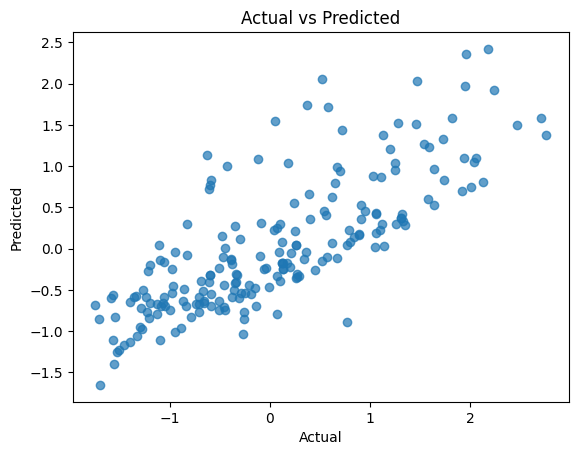

In [32]:
# 시각화로 예측과 실제 데이터 비교하기
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

#### 차원 축소된 데이터에 대해서도 반복해줄게요!

In [35]:
# 모델 학습
regression_model_pca = LinearRegression()
regression_model_pca.fit(X_train_pca, y_train_pca)

# 테스트 데이터에 대한 예측값 계산
y_pred_pca = regression_model_pca.predict(X_test_pca)

# 모델 평가
mse_pca = mean_squared_error(y_test_pca, y_pred_pca)
mae_pca = mean_absolute_error(y_test_pca, y_pred_pca)

'''
r2_score의 경우 위에 두 줄로 작성했던 코드를 한 줄로 대체 가능해요!
y_pred = regression_model.predict(X_test)
r2 = r2_score(y_test, y_pred)

'''
r2_pca = regression_model_pca.score(X_test_pca, y_test_pca)

print("MSE:", mse_pca)
print("MAE:", mae_pca)
print("r2_score:", r2_pca)

MSE: 0.4507045815627621
MAE: 0.5417617003627984
r2_score: 0.5828974852547271


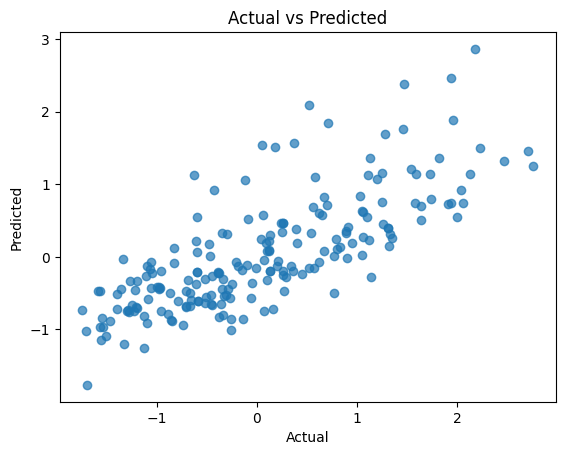

In [36]:
# 시각화로 예측과 실제 데이터 비교하기
plt.scatter(y_test_pca, y_pred_pca, alpha=0.7)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

### Regression Model 2: Ridge Regression: Regularised Linear Model

In [37]:
# 모든 변수에 대해 모델 생성
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.3) # 객체 생성
ridge.fit(X_train,y_train) # 학습
y_pred_ridge = ridge.predict(X_test) # 예측

# 모델 평가 
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("MSE:", mse_ridge)
print("MAE:", mae_ridge)
print("r2_score:", r2_ridge)

MSE: 0.4230555299063576
MAE: 0.5196452163625322
r2_score: 0.6084851749476536


In [38]:
# PCA 데이터에 대해 모델 생성
ridge_pca = Ridge(alpha=0.3) # 객체 생성
ridge_pca.fit(X_train_pca,y_train_pca) # 학습
y_pred_ridge_pca = ridge_pca.predict(X_test_pca) # 예측

# 모델 평가 
mse_ridge_pca = mean_squared_error(y_test_pca, y_pred_ridge_pca)
mae_ridge_pca = mean_absolute_error(y_test_pca, y_pred_ridge_pca)
r2_ridge_pca = r2_score(y_test_pca, y_pred_ridge_pca)

print("MSE:", mse_ridge_pca)
print("MAE:", mae_ridge_pca)
print("r2_score:", r2_ridge_pca)

MSE: 0.45069420620462497
MAE: 0.5417495629032005
r2_score: 0.5829070870829476


### Regression Model 3: Lasso Regression - Regularised Linear Model

In [39]:
# 모든 변수에 대해 모델 생성
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.1) # 객체 생성
lasso.fit(X_train,y_train) # 학습
y_pred_lasso = lasso.predict(X_test) # 예측

# 모델 평가 
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("MSE:", mse_lasso)
print("MAE:", mae_lasso)
print("r2_score:", r2_lasso)

MSE: 0.5075024149233149
MAE: 0.5779199234930552
r2_score: 0.5303341874852088


In [40]:
# PCA 데이터에 대해 모델 생성
lasso_pca = Lasso(alpha=0.1) # 객체 생성
lasso_pca.fit(X_train_pca,y_train_pca) # 학습
y_pred_lasso_pca = lasso_pca.predict(X_test_pca) # 예측

# 모델 평가 
mse_lasso_pca = mean_squared_error(y_test_pca, y_pred_lasso_pca)
mae_lasso_pca = mean_absolute_error(y_test_pca, y_pred_lasso_pca)
r2_lasso_pca = r2_score(y_test_pca, y_pred_lasso_pca)

print("MSE:", mse_lasso_pca)
print("MAE:", mae_lasso_pca)
print("r2_score:", r2_lasso_pca)

MSE: 0.5009896968735804
MAE: 0.5728307270543967
r2_score: 0.5363613529223832


# 4 모델 성능 평가

In [41]:
summary = {'Score': [r2,r2_ridge, r2_lasso],

                    'Score for 6PCA model': [r2_pca,r2_ridge_pca,r2_lasso_pca]

                     }

models=['Linear Regression','Ridge','Lasso']
sum_df = pd.DataFrame(summary,models)

In [42]:
sum_df

,Score,Score for 6PCA model
Linear Regression,0.608112,0.582897
Ridge,0.608485,0.582907
Lasso,0.530334,0.536361


(참고) summary()가 필요하다면 statsmodels의 OLS를 사용할 수 있지만, statsmodels에는 Lasso가 직접 구현되어 있지 않아요.

## 가장 성능이 좋은 모델을 아래 적어주세요!
<span style="color:red"> Ridge 모델!! (근데 선형회귀랑 score이 매우 유사함!)

# 5 모델 성능 개선

불필요한 변수를 제거하거나 하이퍼파라미터 튜닝을 통해 모델 성능을 개선하고, 필요 시 모델을 변경하여 처음부터 다시 진행합니다.

In [43]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import GridSearchCV

# 참고) 해당 모델에 대해 GridSearch를 통해 최적의 하이파라미터를 찾아 model을 개선시켜 봅시다.
alphas = np.logspace(-4, 4, 50)  # alpha 후보들

ridge = Ridge()
ridge_params = {'alpha': alphas}

ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)

print("📌 Ridge Best alpha:", ridge_grid.best_params_['alpha'])
print("📉 Ridge Best MSE:", -ridge_grid.best_score_)

📌 Ridge Best alpha: 0.5689866029018293
📉 Ridge Best MSE: 0.39572336812695363


## 끝!
... 나기 전에 전체적인 회귀 분석 프로세스(순서)에 대해 간단히 적어보며 마칩시다...

<span style="color:red"> *** <span>
1. 데이터 전처리 및 EDA를 통한 데이터 준비
2. 데이터 분할 train_test_split
3. 어떤 모델을 선택해서 회귀를 진행할지 정하기! 
4. train 모델 fit을 통해 학습시키기
5. 학습시킨 모델을 test하기! bt predixt
6. 사용한 모델의 설명력 등을 진단하기
7. R_squared 등을 통해 평가하기

# 진짜 과제 끝!! 수고하셨습니다~:)